***This notebook demonstrate an easy way to create animated gif from 4D-STEM data. This can be easily modified for EELS or EDX signal***

In [1]:
%matplotlib notebook
import hyperspy.api as hs
import numpy as np
import h5py
import pyxem as pxm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import imageio

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


In [2]:
# iBF image
im = hs.load('/dls/e02/data/2021/mg28749-1/processing/Merlin/20210925_135457/20210925_135457_ibf.hspy')
d_path = '/dls/e02/data/2021/mg28749-1/processing/Calibrated/20210925_135457/20210925_135457_data.hdf5'
# 4D STEM
d = hs.load(d_path)

<IPython.core.display.Javascript object>


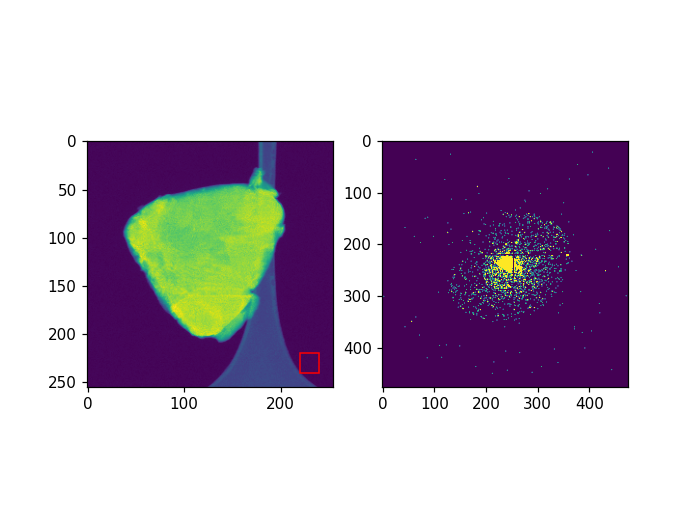

In [3]:
filenames = []
fig, axs = plt.subplots(1,2)
width = 20
axs[0].imshow(im)

i_max = im.data.shape[0] // width
j_max = im.data.shape[1] // width

for i in range(i_max):
    for j in range(j_max):

        axs[0].patches = []
        rect = patches.Rectangle((i * width, j * width), width, width, linewidth=1, edgecolor='r', facecolor='none')
        axs[0].add_patch(rect)

        roi = hs.roi.RectangularROI(i * width, j * width, (i * width) + width, (j * width) + width)
        sr = roi(d)
        sum_reg = sr.sum()
        axs[1].imshow(sum_reg.data, vmax = 0.4 * np.max(sum_reg.data[:,:150]))
        
        filename = f'{i}_{j}.png'
        filenames.append(filename)
        fig.savefig(filename)

In [4]:
with imageio.get_writer('20210925_135457.gif', mode='I', fps=3) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [5]:
for filename in set(filenames):
    os.remove(filename)

![SegmentLocal](20210925_135457.gif "segment")